# Telecom churn prediction

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [368]:
churn_dataset=pd.read_csv(r"C:\Users\sande\Documents\btech\internship\Untitled Folder\Untitled Folder\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [369]:
churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [370]:
churn_dataset.shape

(7043, 21)

In [371]:
churn_dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [372]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [373]:
churn_dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [374]:
churn_dataset['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [375]:
churn_dataset['TotalCharges'] = churn_dataset['TotalCharges'].replace(' ', np.nan)
churn_dataset['TotalCharges'] = pd.to_numeric(churn_dataset['TotalCharges'])

In [376]:
value = (churn_dataset['TotalCharges']/churn_dataset['MonthlyCharges']).median()*churn_dataset['MonthlyCharges']

In [377]:
churn_dataset['TotalCharges'] = value.where(churn_dataset['TotalCharges'] == np.nan, other =churn_dataset['TotalCharges'])

In [378]:
churn_dataset['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

# Exploratory Data Analysis

# Univarite Analysis

In [379]:
churn_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [380]:
churn_dataset['Churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


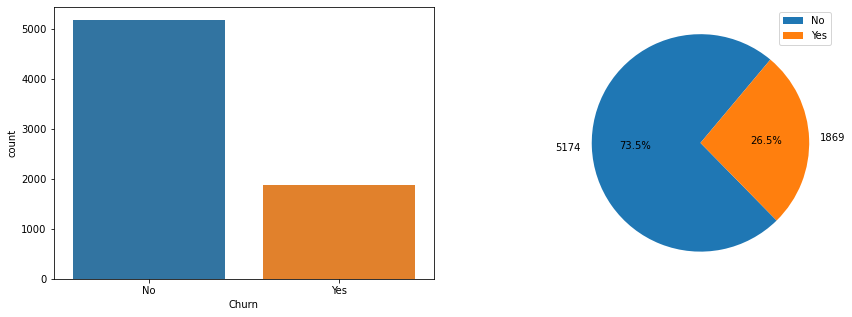

In [381]:
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(churn_dataset['Churn'],ax=axis[0])
plt.pie(churn_dataset['Churn'].value_counts(),labels=churn_dataset['Churn'].value_counts(), autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

we have data with 26.5%(1869) churn rate

# Tenure

In [382]:
# The time for which a customer has been using the service.

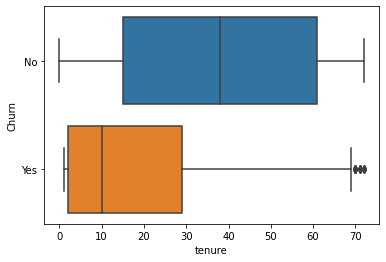

In [383]:
sns.boxplot(x = 'tenure', y = 'Churn', data = churn_dataset)
plt.show()

Customer with more tenure tends to churn less.

# Phone service

In [384]:
# Whether a customer has a landline phone service along with the internet service.

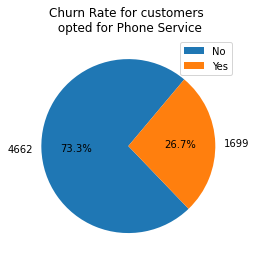

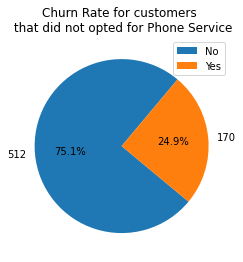

In [385]:
plt.title('Churn Rate for customers \n opted for Phone Service')
plt.gca().set_aspect('equal')
Optedyes=plt.pie(churn_dataset[churn_dataset['PhoneService']=='Yes']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['PhoneService']=='Yes']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for customers \n that did not opted for Phone Service')
OptedNo=plt.pie(churn_dataset[churn_dataset['PhoneService']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['PhoneService']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

# contract

In [386]:
churn_dataset['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

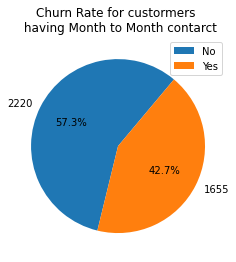

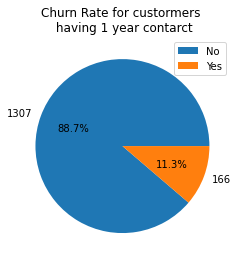

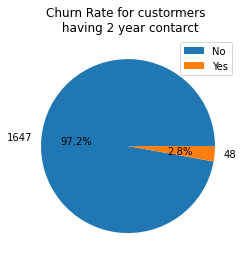

In [387]:
plt.title('Churn Rate for custormers \n having Month to Month contarct')
month=plt.pie(churn_dataset[churn_dataset['Contract']=='Month-to-month']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['Contract']=='Month-to-month']['Churn'].value_counts(),startangle=50,autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for custormers \n having 1 year contarct')
oneyear=plt.pie(churn_dataset[churn_dataset['Contract']=='One year']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['Contract']=='One year']['Churn'].value_counts(),autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for custormers \n having 2 year contarct')
month=plt.pie(churn_dataset[churn_dataset['Contract']=='Two year']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['Contract']=='Two year']['Churn'].value_counts(),autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


Customers with One Year and Two year contract tends to Churn a lot lesser than month to month contract.

# Paperless Billing

In [388]:
churn_dataset['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

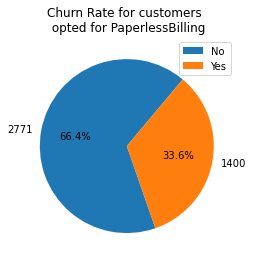

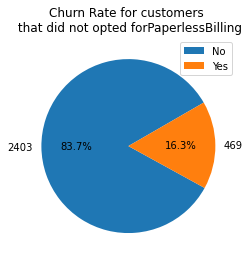

In [389]:
plt.title('Churn Rate for customers \n opted for PaperlessBilling')
Optedyes=plt.pie(churn_dataset[churn_dataset['PaperlessBilling']=='Yes']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['PaperlessBilling']=='Yes']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for customers \n that did not opted forPaperlessBilling')
OptedNo=plt.pie(churn_dataset[churn_dataset['PaperlessBilling']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['PaperlessBilling']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=30)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

# Churn Rate is higher for the customers who opted for paperless billing.

# Payment Method

In [390]:
churn_dataset['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

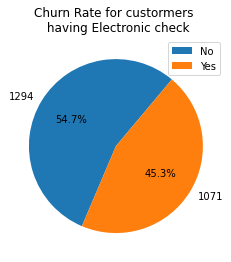

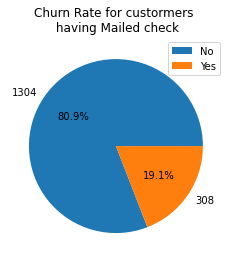

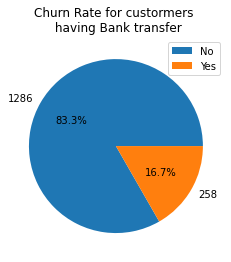

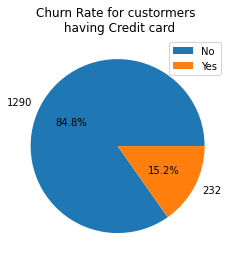

In [391]:
plt.title('Churn Rate for custormers \n having Electronic check')
Electronic_check=plt.pie(churn_dataset[churn_dataset['PaymentMethod']=='Electronic check']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['PaymentMethod']=='Electronic check']['Churn'].value_counts(),startangle=50,autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for custormers \n having Mailed check')
Mailed_check=plt.pie(churn_dataset[churn_dataset['PaymentMethod']=='Mailed check']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['PaymentMethod']=='Mailed check']['Churn'].value_counts(),autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for custormers \n having Bank transfer')
Bank_transfer=plt.pie(churn_dataset[churn_dataset['PaymentMethod']=='Bank transfer (automatic)']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['PaymentMethod']=='Bank transfer (automatic)']['Churn'].value_counts(),autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for custormers \n having Credit card')
Credit_card=plt.pie(churn_dataset[churn_dataset['PaymentMethod']=='Credit card (automatic)']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['PaymentMethod']=='Credit card (automatic)']['Churn'].value_counts(),autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


# Customers with Electronic Check tends to churn more than other payment methods.

Monthly Charges

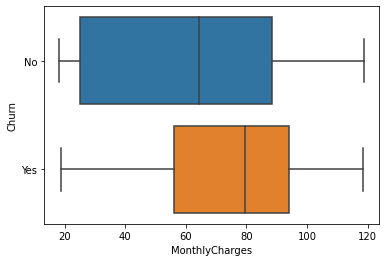

In [392]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data =churn_dataset)
plt.show()

Total charges

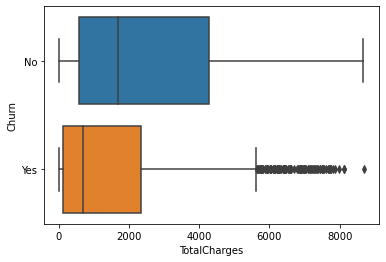

In [393]:
sns.boxplot(x = 'TotalCharges', y = 'Churn', data =churn_dataset)
plt.show()

# Gender

In [394]:
churn_dataset['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

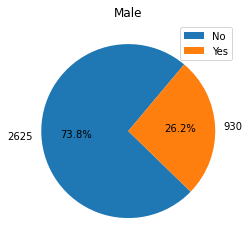

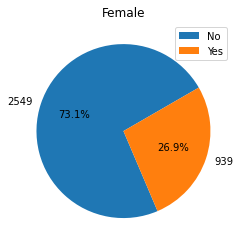

In [395]:
plt.title('Male')
Male=plt.pie(churn_dataset[churn_dataset['gender']=='Male']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['gender']=='Male']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Female')
OptedNo=plt.pie(churn_dataset[churn_dataset['gender']=='Female']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['gender']=='Female']["Churn"].value_counts(),autopct='%1.1f%%',startangle=30)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


No significant effect on churn

# Senior citizen

In [396]:
churn_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [397]:
churn_dataset['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

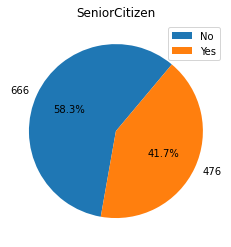

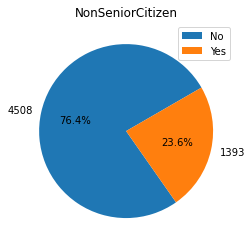

In [398]:
plt.title('SeniorCitizen')
Senior=plt.pie(churn_dataset[churn_dataset['SeniorCitizen']==1]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['SeniorCitizen']==1]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('NonSeniorCitizen')
Nonsenior=plt.pie(churn_dataset[churn_dataset['SeniorCitizen']==0]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['SeniorCitizen']==0]["Churn"].value_counts(),autopct='%1.1f%%',startangle=30)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


Senior Citizens tends to churn more.

# Partner

In [399]:
churn_dataset['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

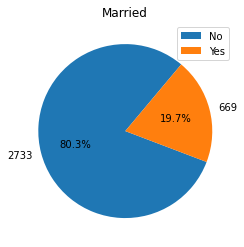

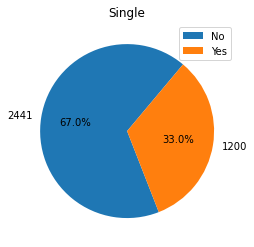

In [400]:
plt.title('Married')
Married=plt.pie(churn_dataset[churn_dataset['Partner']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['Partner']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Single')
Single=plt.pie(churn_dataset[churn_dataset['Partner']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['Partner']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


Customers with are single tends to churn more

# Dependents

In [401]:
churn_dataset['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

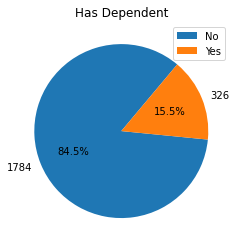

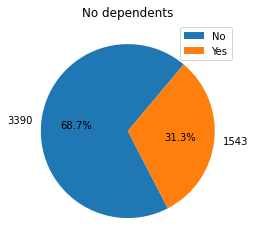

In [402]:
plt.title('Has Dependent')
HasDependent=plt.pie(churn_dataset[churn_dataset['Dependents']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['Dependents']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No dependents')
NoDependents=plt.pie(churn_dataset[churn_dataset['Dependents']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['Dependents']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


Customers with no dependents tends to churn more

# MultipleLines

In [403]:
churn_dataset['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

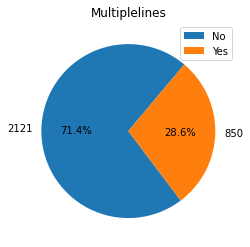

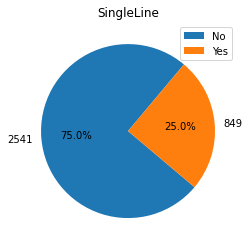

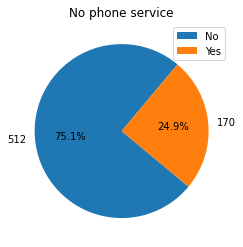

In [404]:
plt.title('Multiplelines')
MultipleLines=plt.pie(churn_dataset[churn_dataset['MultipleLines']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['MultipleLines']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('SingleLine')
singleline=plt.pie(churn_dataset[churn_dataset['MultipleLines']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['MultipleLines']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No phone service')
singleline=plt.pie(churn_dataset[churn_dataset['MultipleLines']=='No phone service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['MultipleLines']=='No phone service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


No signinificant effect on churn

# InternetService

In [405]:
churn_dataset['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

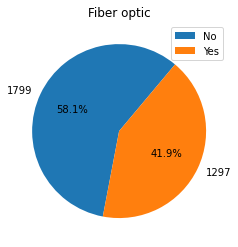

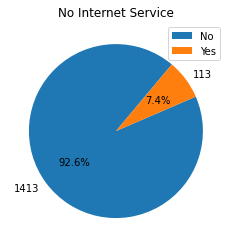

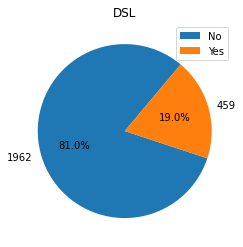

In [406]:
plt.title('Fiber optic')
MultipleLines=plt.pie(churn_dataset[churn_dataset['InternetService']=="Fiber optic"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['InternetService']=="Fiber optic"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No Internet Service')
singleline=plt.pie(churn_dataset[churn_dataset['InternetService']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['InternetService']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('DSL')
singleline=plt.pie(churn_dataset[churn_dataset['InternetService']=='DSL']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['InternetService']=='DSL']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

# OnlineSecurity

In [407]:
churn_dataset['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

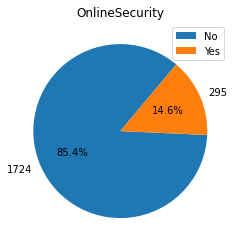

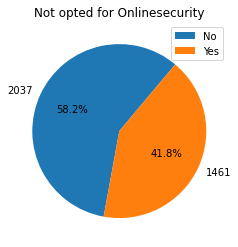

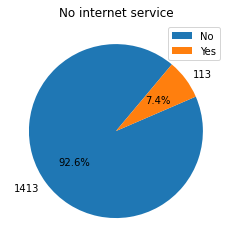

In [408]:
plt.title('OnlineSecurity')
MultipleLines=plt.pie(churn_dataset[churn_dataset['OnlineSecurity']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['OnlineSecurity']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Not opted for Onlinesecurity')
singleline=plt.pie(churn_dataset[churn_dataset['OnlineSecurity']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['OnlineSecurity']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No internet service')
singleline=plt.pie(churn_dataset[churn_dataset['OnlineSecurity']=='No internet service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['OnlineSecurity']=='No internet service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

Customers Not Opted for internet service tends to churn significantly higher and Customer with No internet service churn least

# OnlineBackup

In [409]:
churn_dataset['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

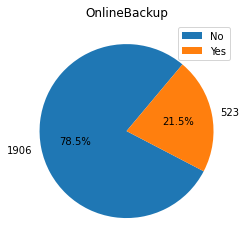

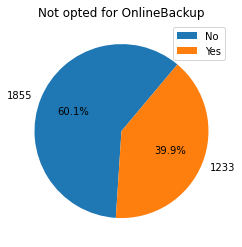

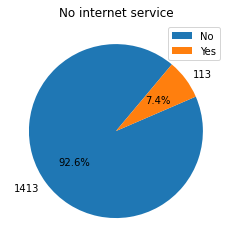

In [410]:
plt.title('OnlineBackup')
MultipleLines=plt.pie(churn_dataset[churn_dataset['OnlineBackup']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['OnlineBackup']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Not opted for OnlineBackup')
singleline=plt.pie(churn_dataset[churn_dataset['OnlineBackup']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['OnlineBackup']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No internet service')
singleline=plt.pie(churn_dataset[churn_dataset['OnlineBackup']=='No internet service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['OnlineBackup']=='No internet service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

 Customers opted for Online Backup churn less than who have not opted.

In [411]:
churn_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# DeviceProtection

In [412]:
churn_dataset['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

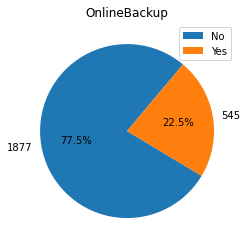

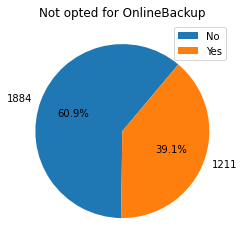

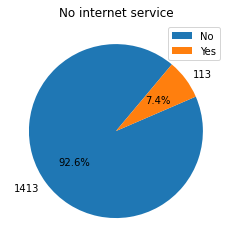

In [413]:
plt.title('OnlineBackup')
opted=plt.pie(churn_dataset[churn_dataset['DeviceProtection']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['DeviceProtection']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Not opted for OnlineBackup')
notopted=plt.pie(churn_dataset[churn_dataset['DeviceProtection']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['DeviceProtection']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No internet service')
nointernet=plt.pie(churn_dataset[churn_dataset['DeviceProtection']=='No internet service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['DeviceProtection']=='No internet service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

Customers opted for Device Potection churn less than who have not opted.

# TechSupport

In [414]:
churn_dataset['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

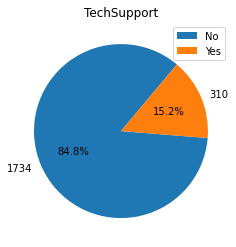

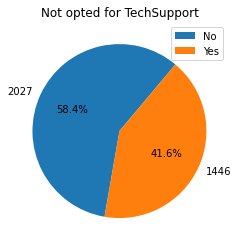

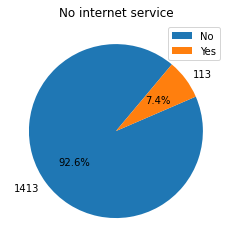

In [415]:
plt.title('TechSupport')
opted=plt.pie(churn_dataset[churn_dataset['TechSupport']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['TechSupport']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Not opted for TechSupport')
notopted=plt.pie(churn_dataset[churn_dataset['TechSupport']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['TechSupport']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No internet service')
nointernet=plt.pie(churn_dataset[churn_dataset['TechSupport']=='No internet service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['TechSupport']=='No internet service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

 Customers opted for Tech Support churn less than who have not opted.

# StreamingTV

In [416]:
churn_dataset['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

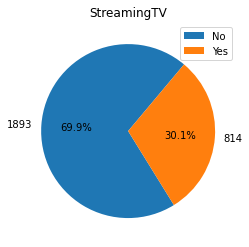

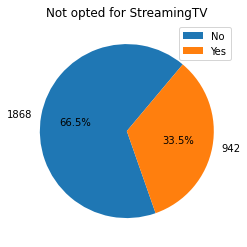

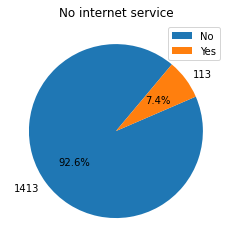

In [417]:
plt.title('StreamingTV')
opted=plt.pie(churn_dataset[churn_dataset['StreamingTV']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['StreamingTV']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Not opted for StreamingTV')
notopted=plt.pie(churn_dataset[churn_dataset['StreamingTV']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['StreamingTV']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No internet service')
nointernet=plt.pie(churn_dataset[churn_dataset['StreamingTV']=='No internet service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['StreamingTV']=='No internet service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

 Streaming TV doesn't make such impact on churning.

# StreamingMovies

In [418]:
churn_dataset['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

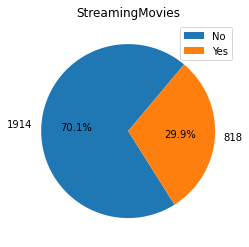

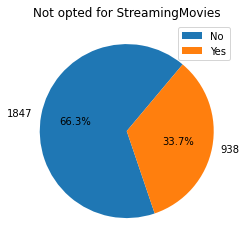

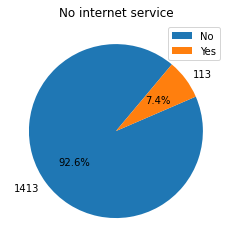

In [419]:
plt.title('StreamingMovies')
opted=plt.pie(churn_dataset[churn_dataset['StreamingMovies']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['StreamingMovies']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Not opted for StreamingMovies')
notopted=plt.pie(churn_dataset[churn_dataset['StreamingMovies']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['StreamingMovies']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No internet service')
nointernet=plt.pie(churn_dataset[churn_dataset['StreamingMovies']=='No internet service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['StreamingMovies']=='No internet service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

Streaming Movies doesn't make such impact on churning.

# Data Preparation

Converting some binary variables (Yes/No) to 0/1

In [420]:
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
churn_dataset[varlist] = churn_dataset[varlist].apply(binary_map)

In [421]:
churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [422]:
dummy1 = pd.get_dummies(churn_dataset[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
churn_dataset = pd.concat([churn_dataset, dummy1], axis=1)

In [423]:
churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1889.50,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,151.65,1,0,0,0,1,0,0,1,0


In [424]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(churn_dataset['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
churn_dataset = pd.concat([churn_dataset,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(churn_dataset['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
churn_dataset = pd.concat([churn_dataset,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(churn_dataset['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
churn_dataset= pd.concat([churn_dataset,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(churn_dataset['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
churn_dataset = pd.concat([churn_dataset,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(churn_dataset['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
churn_dataset= pd.concat([churn_dataset,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(churn_dataset['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
churn_dataset = pd.concat([churn_dataset,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(churn_dataset['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
churn_dataset = pd.concat([churn_dataset,sm1], axis=1)

C:\Users\sande\AppData\Local\Temp\ipykernel_6132\3276044787.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['MultipleLines_No phone service'], 1)
C:\Users\sande\AppData\Local\Temp\ipykernel_6132\3276044787.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  os1 = os.drop(['OnlineSecurity_No internet service'], 1)
C:\Users\sande\AppData\Local\Temp\ipykernel_6132\3276044787.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
C:\Users\sande\AppData\Local\Temp\ipykernel_6132\3276044787.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dp1 = dp.drop(['DeviceProtection

In [425]:
churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,1,0,1,0,1,0,1,0,1,0


In [426]:
churn_dataset= churn_dataset.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

C:\Users\sande\AppData\Local\Temp\ipykernel_6132\3112808326.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  churn_dataset= churn_dataset.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',


In [427]:
churn_dataset.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0


In [428]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [429]:
# Checking for outliers in the continuous variables
num_telecom = churn_dataset[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [430]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

 Checking for Missing Values and Inputing Them

In [431]:
churn_dataset.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [432]:
round(100*(churn_dataset.isnull().sum()/len(churn_dataset.index)),2)

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [435]:
# Removing NaN TotalCharges rows
churn_dataset=churn_dataset[~np.isnan(churn_dataset['TotalCharges'])]

In [437]:
churn_dataset.isnull().sum()

customerID                               0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

# Step 4: Test-Train Split


In [439]:
from sklearn.model_selection import train_test_split

In [440]:
churn_dataset.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,1,0,1,0,1,0,1,0


In [441]:
# Putting feature variable to X
X = churn_dataset.drop(['Churn','customerID'], axis=1)

X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,...,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,1,0,1,0,1,0,1,0,1,0


In [444]:
y=churn_dataset['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 5: Feature Scaling

In [446]:
from sklearn.preprocessing import StandardScaler

In [447]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,1,0,0,1,0,1,0,1,0,1


In [448]:
### Checking the Churn Rate
churn = (sum(churn_dataset['Churn'])/len(churn_dataset['Churn'].index))*100
churn

26.578498293515356

 We have almost 27% churn rate

# Step 6: Looking at Correlations

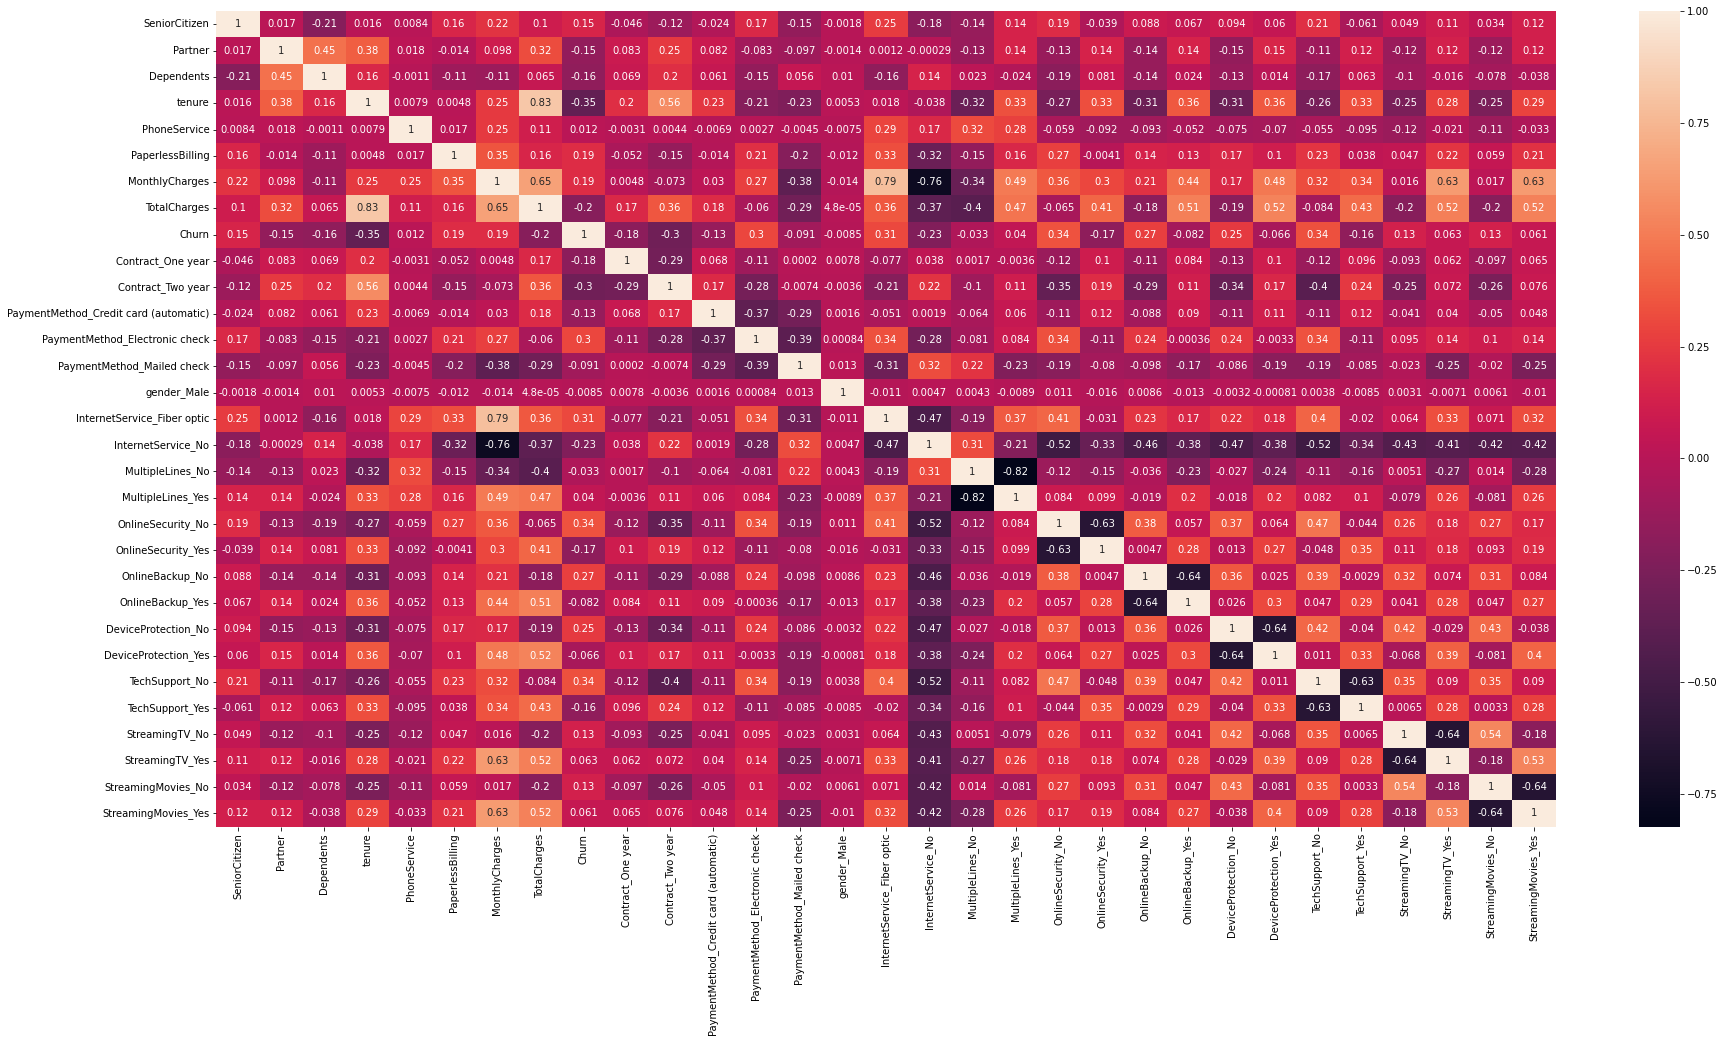

In [449]:
plt.figure(figsize = (30,15))    
sns.heatmap(churn_dataset.corr(),annot = True)
plt.show()

Dropping highly correlated dummy variables

In [450]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

C:\Users\sande\AppData\Local\Temp\ipykernel_6132\1096021196.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
C:\Users\sande\AppData\Local\Temp\ipykernel_6132\1096021196.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',


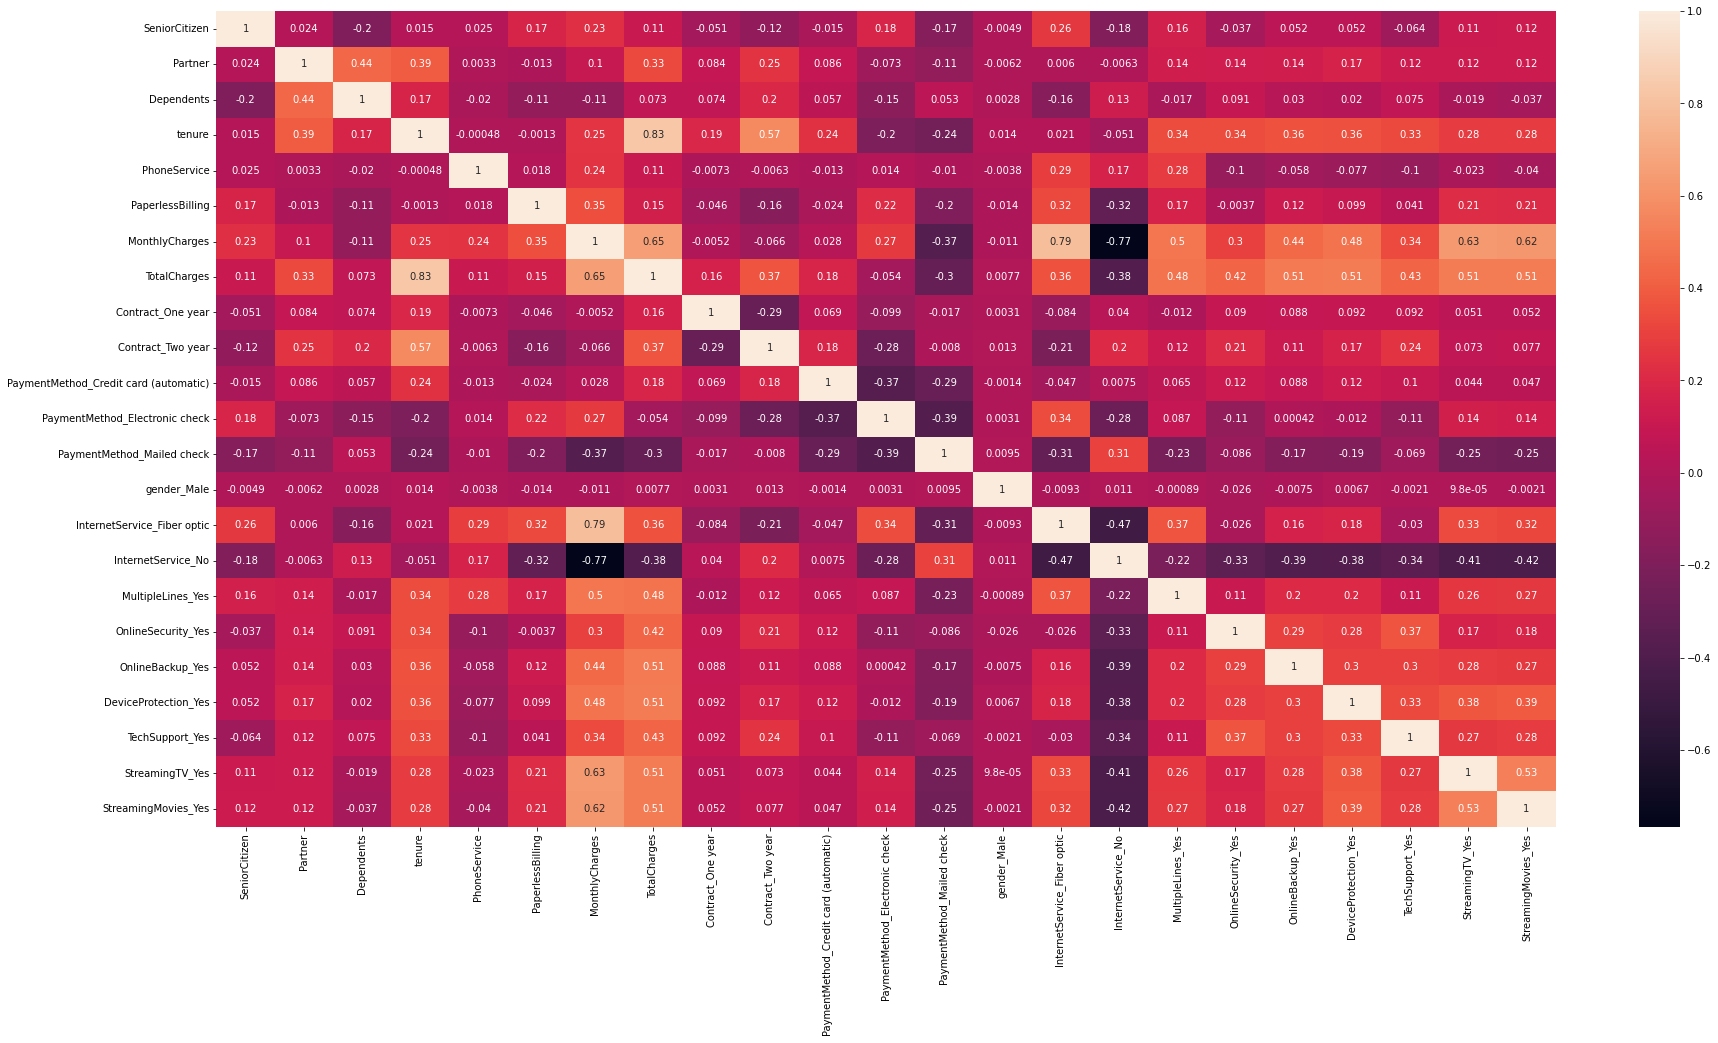

In [452]:
plt.figure(figsize=(30,15))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

# Step 7: Model Building

Running Your First Training Model

In [453]:
import statsmodels.api as sm

In [454]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 24 Dec 2023   Deviance:                       4009.4
Time:                        18:24:02   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

# Step 8: Feature Selection Using RFE

In [455]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [457]:
from sklearn.feature_selection import RFE

In [461]:
rfe = RFE(logreg)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [462]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True,  True])

In [463]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 11),
 ('Dependents', False, 10),
 ('tenure', True, 1),
 ('PhoneService', False, 7),
 ('PaperlessBilling', False, 4),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 3),
 ('PaymentMethod_Electronic check', False, 8),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 12),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 6),
 ('OnlineBackup_Yes', False, 9),
 ('DeviceProtection_Yes', False, 13),
 ('TechSupport_Yes', False, 5),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [464]:
col = X_train.columns[rfe.support_]

In [465]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes'],
      dtype='object')

# Assessing the model with StatsModels

In [466]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.3
Date:                Sun, 24 Dec 2023   Deviance:                       4062.5
Time:                        18:27:02   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2766
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.4327      0.158    -15.402      0.000      -2.742      -2.123
SeniorCitizen                   0.4891      0.099      4.956      0.000       0.296       0.683
tenure                         -1.4711      0.184     -8.010      0.000      -1.831      -1.111
MonthlyCharges                 -1.1549      0.184     -6.279      0.000      -1.515      -0.794
TotalCharges                    0.6548      0.195      3.359      0.001       0.273       1.037
Contract_One year              -0.7616      0.127     -6.018      0.000      -1.010      -0.514
Contract_Two year              -1.4601      0.207     -7.044      0.000      -1.866      -1.054
InternetService_Fiber optic     1.9337      0.196      9.859      0.000       1.549       2.318
InternetService_No             -1.9165      0.211     -9.089      0.000      -2.330      -1.503
MultipleLines_Yes               0.4522      0.102      4.451      0.000       0.253       0.651
StreamingTV_Yes                 0.6792      0.111      6.119      0.000       0.462       0.897
StreamingMovies_Yes             0.5596      0.109      5.140      0.000       0.346       0.773
===============================================================================================
"""

In [467]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.141849
5790    0.234950
6498    0.520938
880     0.498011
2784    0.651654
3874    0.319438
5387    0.492438
6623    0.776976
4465    0.179572
5364    0.547303
dtype: float64

In [468]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14184908, 0.23495033, 0.52093813, 0.49801078, 0.65165382,
       0.31943794, 0.49243768, 0.77697601, 0.17957212, 0.54730313])

# Creating a dataframe with the actual churn flag and the predicted probabilities

In [469]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.141849,879
1,0,0.234950,5790
2,1,0.520938,6498
3,1,0.498011,880
4,1,0.651654,2784


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [470]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.141849,879,0
1,0,0.234950,5790,0
2,1,0.520938,6498,1
3,1,0.498011,880,0
4,1,0.651654,2784,1


In [471]:
from sklearn import metrics


In [472]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3257  378]
 [ 593  694]]


In [473]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8027224705404307


# Checking VIFs

In [474]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [475]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,12.77
3,TotalCharges,10.09
1,tenure,6.77
7,InternetService_No,4.88
6,InternetService_Fiber optic,4.42
5,Contract_Two year,2.63
9,StreamingTV_Yes,2.61
10,StreamingMovies_Yes,2.61
8,MultipleLines_Yes,2.25
4,Contract_One year,1.66


In [477]:
col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [478]:
col = col.drop('MonthlyCharges', 1)
col

Index(['SeniorCitizen', 'tenure', 'TotalCharges', 'Contract_One year',
       'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [479]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.3
Date:                Sun, 24 Dec 2023   Deviance:                       4102.7
Time:                        18:32:57   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2707
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7295      0.105    -16.454      0.000      -1.935      -1.523
SeniorCitizen                   0.5399      0.098      5.500      0.000       0.347       0.732
tenure                         -1.1578      0.175     -6.622      0.000      -1.501      -0.815
TotalCharges                    0.2282      0.181      1.257      0.209      -0.127       0.584
Contract_One year              -0.8448      0.125     -6.741      0.000      -1.090      -0.599
Contract_Two year              -1.5718      0.206     -7.628      0.000      -1.976      -1.168
InternetService_Fiber optic     0.9129      0.104      8.803      0.000       0.710       1.116
InternetService_No             -0.9741      0.150     -6.504      0.000      -1.268      -0.681
MultipleLines_Yes               0.2098      0.093      2.265      0.024       0.028       0.391
StreamingTV_Yes                 0.3257      0.095      3.430      0.001       0.140       0.512
StreamingMovies_Yes             0.2276      0.094      2.409      0.016       0.042       0.413
===============================================================================================
"""

In [480]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [481]:
y_train_pred[:10]

array([0.16720396, 0.17428949, 0.61073896, 0.66263764, 0.70960979,
       0.30832111, 0.35420237, 0.76843759, 0.11643261, 0.55894329])

In [482]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [483]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.167204,879,0
1,0,0.174289,5790,0
2,1,0.610739,6498,1
3,1,0.662638,880,1
4,1,0.709610,2784,1


In [484]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8015034538805363


In [485]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.08
1,tenure,6.45
5,InternetService_Fiber optic,2.59
9,StreamingMovies_Yes,2.51
8,StreamingTV_Yes,2.50
4,Contract_Two year,2.47
7,MultipleLines_Yes,2.20
6,InternetService_No,2.14
3,Contract_One year,1.54
0,SeniorCitizen,1.29


In [486]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['SeniorCitizen', 'tenure', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [487]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4912
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.1
Date:                Sun, 24 Dec 2023   Deviance:                       4104.3
Time:                        18:34:30   Pearson chi2:                 5.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2705
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7529      0.103    -17.022      0.000      -1.955      -1.551
SeniorCitizen                   0.5394      0.098      5.484      0.000       0.347       0.732
tenure                         -0.9548      0.064    -14.950      0.000      -1.080      -0.830
Contract_One year              -0.8386      0.125     -6.714      0.000      -1.083      -0.594
Contract_Two year              -1.5480      0.204     -7.572      0.000      -1.949      -1.147
InternetService_Fiber optic     0.9680      0.094     10.297      0.000       0.784       1.152
InternetService_No             -0.9813      0.149     -6.574      0.000      -1.274      -0.689
MultipleLines_Yes               0.2295      0.091      2.516      0.012       0.051       0.408
StreamingTV_Yes                 0.3527      0.093      3.812      0.000       0.171       0.534
StreamingMovies_Yes             0.2532      0.092      2.744      0.006       0.072       0.434
===============================================================================================
"""

In [488]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [489]:
y_train_pred[:10]

array([0.17622463, 0.19175912, 0.60902876, 0.66782264, 0.71751273,
       0.3022804 , 0.3448791 , 0.77067759, 0.12713847, 0.56549694])

In [490]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [491]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.176225,879,0
1,0,0.191759,5790,0
2,1,0.609029,6498,1
3,1,0.667823,880,1
4,1,0.717513,2784,1


In [492]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8000812677773262


The accuracy is still practically the same.

In [493]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,StreamingMovies_Yes,2.45
7,StreamingTV_Yes,2.43
4,InternetService_Fiber optic,2.41
3,Contract_Two year,2.40
6,MultipleLines_Yes,2.18
1,tenure,1.72
5,InternetService_No,1.67
2,Contract_One year,1.53
0,SeniorCitizen,1.28


In [494]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3271,  364],
       [ 620,  667]], dtype=int64)

In [495]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8000812677773262

# Metrics beyond simply accuracy

In [496]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0]

In [497]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5182595182595182

In [498]:
# Let us calculate specificity
TN / float(TN+FP)

0.8998624484181568

In [499]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10013755158184319


In [500]:
# positive predictive value 
print (TP / float(TP+FP))

0.646944713870029


In [501]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8406579285530712


In [502]:
from sklearn.metrics import precision_score, recall_score

In [503]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.646944713870029

In [504]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5182595182595182

# Precision and recall tradeoff

In [505]:
from sklearn.metrics import precision_recall_curve

In [506]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [507]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

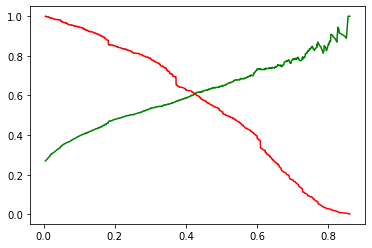

In [508]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 11: Making predictions on the test set

In [509]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [510]:
X_test = X_test[col]
X_test.head()

,SeniorCitizen,tenure,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,0,-0.347623,0,0,1,0,0,0,1
3730,0,0.999203,0,0,1,0,1,1,1
1761,0,1.040015,0,1,0,1,1,0,0
2283,0,-1.286319,0,0,1,0,0,0,0
1872,0,0.346196,0,1,0,1,0,0,0


In [511]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [512]:
y_test_pred = res.predict(X_test_sm)

In [513]:
y_test_pred[:10]

942     0.450206
3730    0.288317
1761    0.006397
2283    0.609029
1872    0.009828
1970    0.636934
2532    0.308136
1616    0.006180
2485    0.541453
5914    0.188477
dtype: float64

In [514]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [515]:
# Let's see the head
y_pred_1.head()

,0
942,0.450206
3730,0.288317
1761,0.006397
2283,0.609029
1872,0.009828


In [516]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [517]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [518]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [520]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [521]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.450206
1,1,3730,0.288317
2,0,1761,0.006397
3,1,2283,0.609029
4,0,1872,0.009828


In [522]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [524]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,942,0.450206
1,1,3730,0.288317
2,0,1761,0.006397
3,1,2283,0.609029
4,0,1872,0.009828


In [525]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [526]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,942,0.450206,1
1,1,3730,0.288317,0
2,0,1761,0.006397,0
3,1,2283,0.609029,1
4,0,1872,0.009828,0


In [527]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7758293838862559

In [528]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1292,  236],
       [ 237,  345]], dtype=int64)

In [529]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0]

In [530]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5927835051546392

In [531]:
# Let us calculate specificity
TN / float(TN+FP)

0.8455497382198953